# Performance metrics 

#### Mean Loss: 
This indicates the average loss (often measured as cross-entropy loss or mean squared error) calculated over all samples in the test set. A lower mean loss generally indicates better performance of the model in terms of its ability to minimize prediction errors.

#### PCK 0.05: 
PCK stands for Percentage of Correct Keypoints. It's a commonly used metric in computer vision tasks, especially for evaluating the accuracy of pose estimation models. In your case, PCK@0.05 indicates the percentage of correctly estimated keypoints when the error threshold is set to 5% of the image size. For example, if a keypoint falls within 5% of the image size from its ground truth position, it's considered a correct estimation.

#### NE
NE is defined as the average normalized Euclidean distance between the ground-truth keypoints and the predictions in pixels, normalized by the diagonal of the input image. The predicted keypoints correspond to the position of the maximum values in each of the predicted heatmaps by the network

#### NEavg: 
This stands for Normalized Error averaged over all keypoints. It's another measure of accuracy in pose estimation tasks. Normalized Error is the Euclidean distance between the predicted keypoint and the ground truth keypoint, normalized by a reference length (often a fraction of the image diagonal). NEavg calculates the average normalized error across all keypoints in the dataset. A lower NEavg value indicates better accuracy.


#### preds.csv file
When reading the preds.csv file: you see the actual keypoints coordinates and the predicted ones. these coordinates are all given in the frame 288/4 x 384/4.                                                                              
to transfer to the 288x384 (which gives the image and keypoints after all transformation) just *4

#### vis_enabled='True' or 'False':
when setting it to True it meanes: use visiblity status labels. given by 0,1 and -1.                        
when setting it to False it meanes: do not use the vis stautes labels. Here it uses all the lables eventhough they are not visible. 

In [6]:
"""import os
import sys
import torch"""
#from torch.utils.data import Dataset
#from pathlib import Path



# Import testdata
One test dataset for all models

In [9]:


from roboflow import Roboflow
rf = Roboflow(api_key="XmQwYEpWmwcdhE311FhB")
project = rf.workspace("nabilian").project("right_gtt")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to right_gtt-1 in yolov5pytorch:: 100%|██████████| 404/404 [00:00<00:00, 1183.50it/s]


-----------------------------------------------------------------------------------------------------------------

In [3]:
# Rename the left and right images 
import os

# Define the directories containing images and labels
image_dir = "dataset/Test_system_gt/left_gtt-1/images_rename"
label_dir = "dataset/Test_system_gt/left_gtt-1/labels_to_rename"

# Ensure both directories exist
if not os.path.exists(image_dir) or not os.path.exists(label_dir):
    print("Image or label directory does not exist.")
    exit()

# Get a list of files in each directory
image_files = sorted(os.listdir(image_dir))
label_files = sorted(os.listdir(label_dir))

# Ensure the number of images and labels match
if len(image_files) != len(label_files):
    print("Number of images and labels do not match.")
    exit()

# Rename images and labels
for i, (image_file, label_file) in enumerate(zip(image_files, label_files), start=1):
    if image_file.startswith("rgb_") and image_file.endswith(".jpg") \
            and label_file.startswith("rgb_") and label_file.endswith(".txt"):
        # Generate new names
        new_image_name = f"rgb_{i}.jpg"
        new_label_name = f"rgb_{i}.txt"
        
        old_image_path = os.path.join(image_dir, image_file)
        new_image_path = os.path.join(image_dir, new_image_name)
        old_label_path = os.path.join(label_dir, label_file)
        new_label_path = os.path.join(label_dir, new_label_name)
        
        # Print old and new image names
        print(f"Old Image Name: {old_image_path}")
        print(f"New Image Name: {new_image_path}")
        
        # Rename image file
        os.rename(old_image_path, new_image_path)
        
        # Print old and new label names
        print(f"Old Label Name: {old_label_path}")
        print(f"New Label Name: {new_label_path}")
        
        # Rename label file
        os.rename(old_label_path, new_label_path)



Old Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_1.jpg
New Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_1.jpg
Old Label Name: dataset/Test_system_gt/left_gtt-1/labels_to_rename/rgb_1.txt
New Label Name: dataset/Test_system_gt/left_gtt-1/labels_to_rename/rgb_1.txt
Old Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_1001.jpg
New Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_2.jpg
Old Label Name: dataset/Test_system_gt/left_gtt-1/labels_to_rename/rgb_1001.txt
New Label Name: dataset/Test_system_gt/left_gtt-1/labels_to_rename/rgb_2.txt
Old Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_101.jpg
New Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_3.jpg
Old Label Name: dataset/Test_system_gt/left_gtt-1/labels_to_rename/rgb_101.txt
New Label Name: dataset/Test_system_gt/left_gtt-1/labels_to_rename/rgb_3.txt
Old Image Name: dataset/Test_system_gt/left_gtt-1/images_rename/rgb_1026.jpg
New Ima

# Preprocess the test data:

In [5]:
# Rename the images and bbox labels
import os

def rename_images(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file
    for file_name in files:
        # Check if the file is an image (you can extend this check if needed)
        if file_name.endswith('.txt'):
            # Split the file name into base and extension
            base_name, ext = os.path.splitext(file_name)
            
            # Split the base name to get the number
            parts = base_name.split('r')
            num = parts[-1]
            
            # Create the new file name
            new_name = f"rgb_{num}{ext}"
            
            # Construct the full file paths
            old_path = os.path.join(folder_path, file_name)
            new_path = os.path.join(folder_path, new_name)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed {file_name} to {new_name}")

# Replace 'folder_path' with the path to your folder containing images
folder_path =  'dataset/Test_system/Run_right/labels'
rename_images(folder_path)


Renamed imgr157.txt to rgb_157.txt
Renamed imgr66.txt to rgb_66.txt
Renamed imgr55.txt to rgb_55.txt
Renamed imgr126.txt to rgb_126.txt
Renamed imgr47.txt to rgb_47.txt
Renamed imgr171.txt to rgb_171.txt
Renamed imgr163.txt to rgb_163.txt
Renamed imgr39.txt to rgb_39.txt
Renamed imgr140.txt to rgb_140.txt
Renamed imgr97.txt to rgb_97.txt
Renamed imgr9.txt to rgb_9.txt
Renamed imgr30.txt to rgb_30.txt
Renamed imgr122.txt to rgb_122.txt
Renamed imgr90.txt to rgb_90.txt
Renamed imgr104.txt to rgb_104.txt
Renamed imgr63.txt to rgb_63.txt
Renamed imgr115.txt to rgb_115.txt
Renamed imgr23.txt to rgb_23.txt
Renamed imgr152.txt to rgb_152.txt
Renamed imgr76.txt to rgb_76.txt
Renamed imgr158.txt to rgb_158.txt
Renamed imgr143.txt to rgb_143.txt
Renamed imgr111.txt to rgb_111.txt
Renamed imgr82.txt to rgb_82.txt
Renamed imgr160.txt to rgb_160.txt
Renamed imgr6.txt to rgb_6.txt
Renamed imgr38.txt to rgb_38.txt
Renamed imgr135.txt to rgb_135.txt
Renamed imgr5.txt to rgb_5.txt
Renamed imgr167.txt t

In [6]:
# resize the images that are cropped in yolo


from PIL import Image
import os

# Path to the folder containing images
folder_path =  'dataset/Test_system/right/images'

# Desired dimensions
width = 288
height =384
# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        # Open the image file
        with Image.open(os.path.join(folder_path, filename)) as img:
            # Resize the image
            resized_img = img.resize((width, height))
            # Save the resized image, overwriting the original file
            resized_img.save(os.path.join(folder_path, filename))



In [5]:
from utils.crop_imgs_preprocess import process_images
from utils.crop_imgs_preprocess import rename_images
from utils.crop_imgs_preprocess import rename_labels

image_folder = 'dataset/Test_system_gt/left_gtt-1/left/images'
bbox_folder =  'dataset/Test_system_gt/left_gtt-1/left/labels'
keypoints_file = 'dataset/Test_system_gt/left_gtt-1/keypointVisibel_leftCamera.csv'
output_folder = 'dataset/Test_system_gt/left_gtt-1/left/cropped_imgs'
KP_output_file = 'dataset/Test_system_gt/left_gtt-1/left/modified_keypoints.csv'

original_image_size = (640, 640)


#First rename the images and bbox labels, because they have random names from RoboFlow:
#rename_images(image_folder)
#rename_labels(bbox_folder)

# Cropp the images and save them to a new folder and save the new adjusted keypoints to a new file:
process_images(image_folder, output_folder, bbox_folder, keypoints_file,KP_output_file, original_image_size)

rgb_8.jpg 0
Error processing image rgb_8.jpg: list index out of range
rgb_127.jpg 1
Error processing image rgb_127.jpg: list index out of range
rgb_166.jpg 2
Error processing image rgb_166.jpg: list index out of range
rgb_170.jpg 3
Error processing image rgb_170.jpg: list index out of range
rgb_75.jpg 4
Error processing image rgb_75.jpg: list index out of range
rgb_194.jpg 5
Error processing image rgb_194.jpg: list index out of range
rgb_107.jpg 6
Error processing image rgb_107.jpg: list index out of range
rgb_197.jpg 7
Error processing image rgb_197.jpg: list index out of range
rgb_94.jpg 8
Error processing image rgb_94.jpg: list index out of range
rgb_179.jpg 9
Error processing image rgb_179.jpg: list index out of range
rgb_12.jpg 10
Error processing image rgb_12.jpg: list index out of range
rgb_47.jpg 11
Error processing image rgb_47.jpg: list index out of range
rgb_34.jpg 12
Error processing image rgb_34.jpg: list index out of range
rgb_36.jpg 13
Error processing image rgb_36.jpg: 

# Read the test dataset and plot an item


loading annotations from:  dataset/testdata-1/test/labels/labels.csv


100%|██████████| 46/46 [00:00<00:00, 880.02it/s]

keypoints before transforms: 
 [[  241.55   329.35]
 [  251.55   329.35]
 [  262.99   231.39]
 [  275.14   237.78]
 [   62.89    85.18]
 [   60.03    71.69]
 [-1908.09 -1350.74]
 [-6749.06 -4992.  ]]


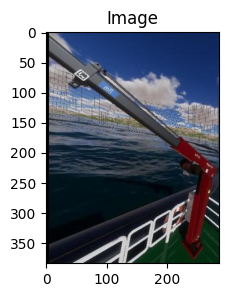

[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [-1.]
 [-1.]]
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [-1.]
 [-1.]]


In [2]:
from utils.datasets import PoseDataset

dataset_dir = 'dataset/testdata-1/test'
dataset = PoseDataset(dataset_dir=dataset_dir, is_train=False, vis_enabled='True')
image, heatmaps_gt, target_weight, sample_data = dataset.__getitem__(3)
print(target_weight)
print(target_weight)

-----------------------------------------------------------------------------------------------------------------

# Run the testing on your model: 👌

In [2]:
#$ python val.py --dataset './datasets/eval/RealSet_test_debug' --weights './experiments/archived/Vis0_FDR_15k_best.pth' --pck_thr 0.05


#Set --vis_enable=True --> none-visible keypoints dont get prdicted
# it meanes: use visiblity status labels if enabled


!python val.py --dataset 'dataset/testdata-1/test' --weights './logs/14000/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        


device:  cuda:0
Loading checkpoint ...
 ./logs/14000/checkpoint_best_loss.pth 

Checkpoint's epoch:  11

loading annotations from:  dataset/testdata-1/test/labels/labels.csv
100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 160.83it/s]
batch_size:  1
dataset length :  46
Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  11%|███▍                            | 5/46 [00:20<01:47,  2.62s/it]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  15%|████▊                           | 7/46 [00:20<01:00,  1.54s/it]Figure(300x300)
Figure(300x300)
Evaluation:  24%|███████▍                       | 11/46 [00:21<00:23,  1.52it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  33%|██████████                     | 15/46 [00:21<00:10,  2.94it/s]Figure(300x300)
Figure(300x300)
Evaluation:  37%|███

-------------------------------------------------

# Plot 
#### -The Nomalized Erro NE for each keypoint vs dataset-size
#### -The avarage Nomalized Erro NE vs dataset-size

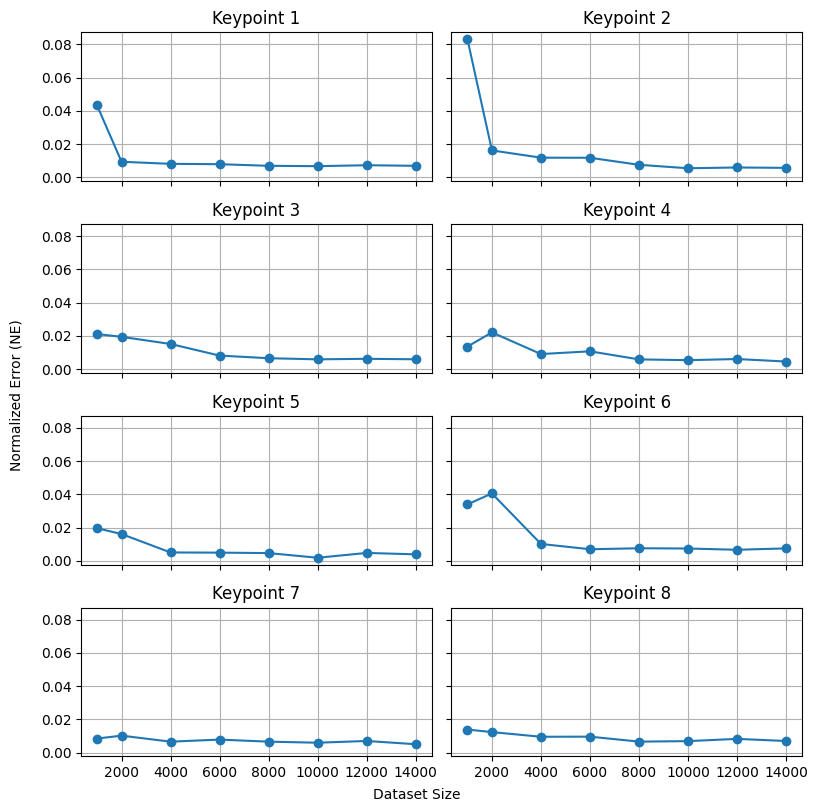

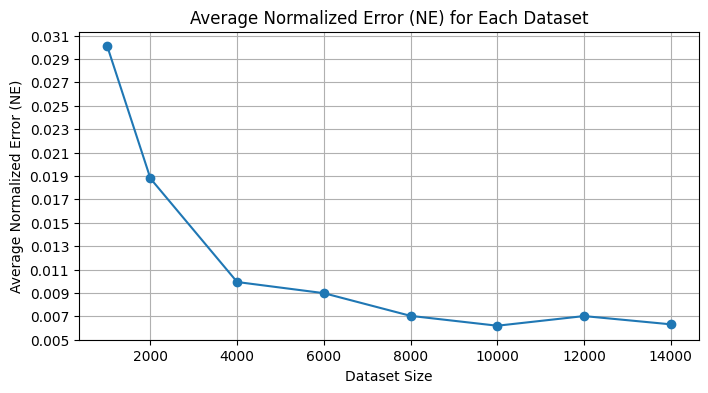

In [5]:
from utils.crop_imgs_preprocess import plot_average_NE_vs_dataset_size
from utils.crop_imgs_preprocess import plot_keypoints_NE_vs_dataset_size



dataset_sizes = [1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

csv_files = {
    'Dataset 1': 'runs/val/OLD_test_1000_imgs/res_summary.csv',
    'Dataset 2': 'runs/val/test_1000_imgs/res_summary.csv',
    'Dataset 3': 'runs/val/test_4000_imgs/res_summary.csv',
    'Dataset 4': 'runs/val/test_6000_imgs/res_summary.csv',
    'Dataset 5': 'runs/val/test_8000_imgs/res_summary.csv',
    'Dataset 6': 'runs/val/test_10000_imgs/res_summary.csv',
    'Dataset 7': 'runs/val/test_12000_imgs/res_summary.csv',
    'Dataset 8': 'runs/val/test_14000_imgs/res_summary.csv',
}


plot_keypoints_NE_vs_dataset_size(csv_files, dataset_sizes, figsize=(8, 8), save_path= 'Figures_Report/keypointVSdatasetsize.pdf')
print("\n\n")
plot_average_NE_vs_dataset_size(csv_files, dataset_sizes, figsize=(8, 4), save_path= 'Figures_Report/keypointVSdatasetsize_avarage.pdf')

-------------------------------------------------------------------------------------------------------------------

# Plot the Gt and preds keypoints:

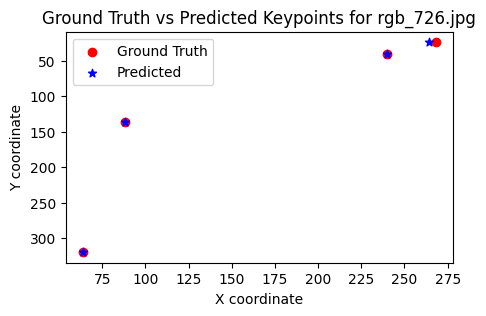

In [1]:
import pandas as pd
from utils.crop_imgs_preprocess import plot_keypoints 

vis_enabled = True
df = pd.read_csv('runs/val/test_10000_imgs/preds.csv')

i = 0
for index, row in df.iterrows():
    if i == 2:
        plot_keypoints(row, vis_enable=vis_enabled , save_path='Figures_Report/GT_vs_pred_keypoints_rgb726.pdf')
        break
    i=i+1


-------------------------------------------------------------------------------------------------------------------

# Compare the NE for the two models trained on datasetset with and without aruco markers
#### The size was 2000 images for both models here

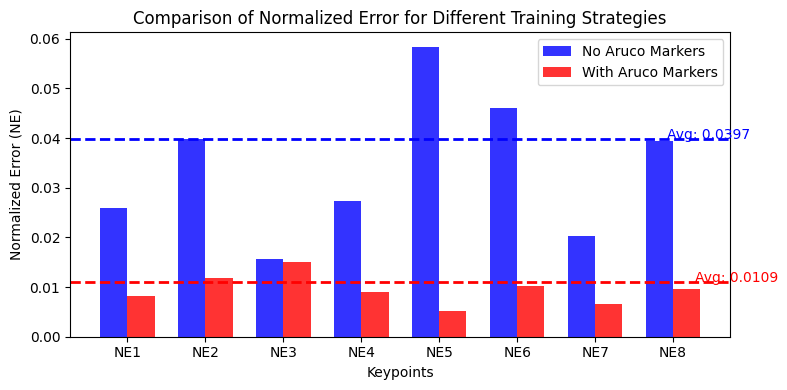

In [1]:
from utils.crop_imgs_preprocess import plot_NE_comparison 
import pandas as pd

no_markers_test_df = pd.read_csv('runs/val/no_markers_test/without_marker_res_summary.csv') 
with_markers_test_df = pd.read_csv('runs/val/test_4000_imgs/res_summary.csv')

plot_NE_comparison(no_markers_test_df, with_markers_test_df, save_path='Figures_Report/with_without_Aruco.pdf')


----------------------------------------------------------------------------------------------------------------------------

# The effect of inclusion or exclusion of occluded keypoints during training.


In [1]:
!python val.py --dataset 'dataset/testdata-1/test' --weights './logs/visenable_False/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=False        


device:  cuda:0
Loading checkpoint ...
 ./logs/visenable_False/checkpoint_best_loss.pth 

Checkpoint's epoch:  17

loading annotations from:  dataset/testdata-1/test/labels/labels.csv
100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 318.78it/s]
batch_size:  1
dataset length :  46
Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   2%|▋                               | 1/46 [00:21<15:56, 21.25s/it]Figure(300x300)
Figure(300x300)
Evaluation:   9%|██▊                             | 4/46 [00:21<02:50,  4.05s/it]Figure(300x300)
Figure(300x300)
Evaluation:  15%|████▊                           | 7/46 [00:21<01:13,  1.89s/it]Figure(300x300)
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  22%|██████▋                        | 10/46 [00:21<00:39,  1.11s/it]Figure(300x300)
Figure(300x300)
Figure(300

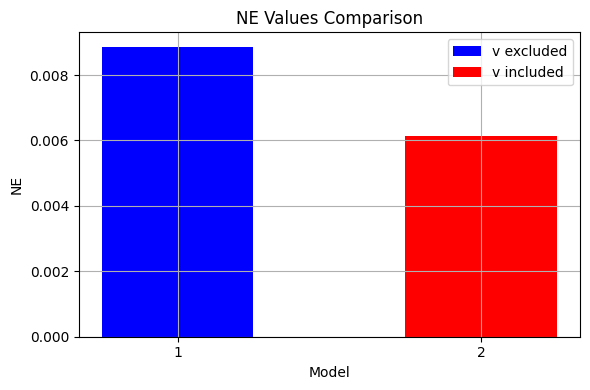

In [1]:
from utils.crop_imgs_preprocess import compare_results


# Example usage:
csv_file1 = 'runs/val/visenable_False/res_summary.csv'
csv_file2 = 'runs/val/test_10000_imgs/res_summary.csv'
metric = 'NE'
compare_results(csv_file1, csv_file2, metric, 'v excluded', 'v included',  save_path='Figures_Report/v_incl_excl.pdf' )

 --------------------------------------------------------------------------------------------------------------------------------

# The effect of occluding objects during training.


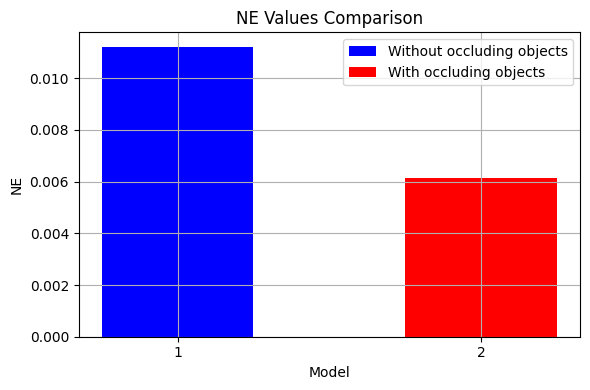

In [2]:
from utils.crop_imgs_preprocess import compare_results


# Example usage:
csv_file1 = 'runs/val/visenable_False/res_summary-no_occlusion1.csv'
csv_file2 = 'runs/val/test_10000_imgs/res_summary.csv'
metric = 'NE'
compare_results(csv_file1, csv_file2, metric,'Without occluding objects', 'With occluding objects' ,  save_path='Figures_Report/occluding_objects.pdf')

# Test on images with crane detected using YOLOv5
#### This model is trained on 4000 images with bbox labels detected using Yolov5

In [19]:
!python val.py --dataset 'dataset/testdata-1/test' --weights './logs/yolov5_detected_crane/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        

#result saved to: runs/val/yolov5_detected_crane

device:  cuda:0
Loading checkpoint ...
 ./logs/yolov5_detected_crane/checkpoint_best_loss.pth 

Checkpoint's epoch:  13

loading annotations from:  dataset/testdata-1/test/labels/labels.csv
100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 971.14it/s]
batch_size:  1
dataset length :  46
Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   2%|▋                               | 1/46 [00:01<00:55,  1.23s/it]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   9%|██▊                             | 4/46 [00:01<00:10,  3.83it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  17%|█████▌                          | 8/46 [00:01<00:04,  8.16it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  26%|████████                       | 12/46 [00:01<00:02

 #### Compare 2000-images model trained on Gt-bbox vs Yolo-bbox

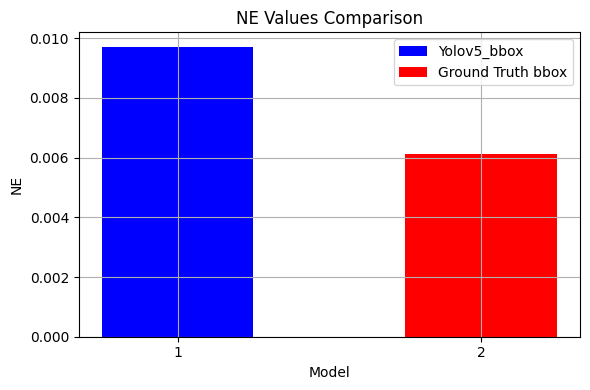

In [4]:
from utils.crop_imgs_preprocess import compare_results


# Example usage:
csv_file1 = 'runs/val/yolov5_detected_crane/res_summary.csv'
csv_file2 = 'runs/val/test_10000_imgs/res_summary.csv'
metric = 'NE'
compare_results(csv_file1, csv_file2, metric, 'Yolov5_bbox', 'Ground Truth bbox',  save_path='Figures_Report/Yolo_croped_trained.pdf')


------------------------------------------------------------------------------------------------------------------------------------------------------

# Test on images with model trained on none cropped images
#### The test images are also not crooped

In [ ]:
!python val.py --dataset 'dataset/BilderFraC/test' --weights './logs/NoCropp/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        


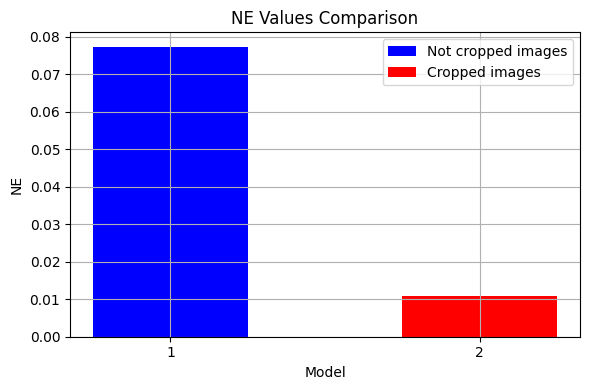

In [11]:
from utils.crop_imgs_preprocess import compare_results


# Example usage:
csv_file1 = 'runs/val/NoCropp/res_summary.csv'
csv_file2 = 'runs/val/test_4000_imgs/res_summary.csv' #say 2000 images
metric = 'NE'
compare_results(csv_file1, csv_file2, metric, 'Not cropped images', 'Cropped images')




----------------------------------------------------------------------------------------------------------------------------------------------

# Three plots, GT, Yolo, Not cropped

##### Test on images with model trained on none cropped images. The test images are also not crooped
##### Test on images with crane detected using YOLOv5. This model is trained on 4000 images with bbox labels detected using Yolov5

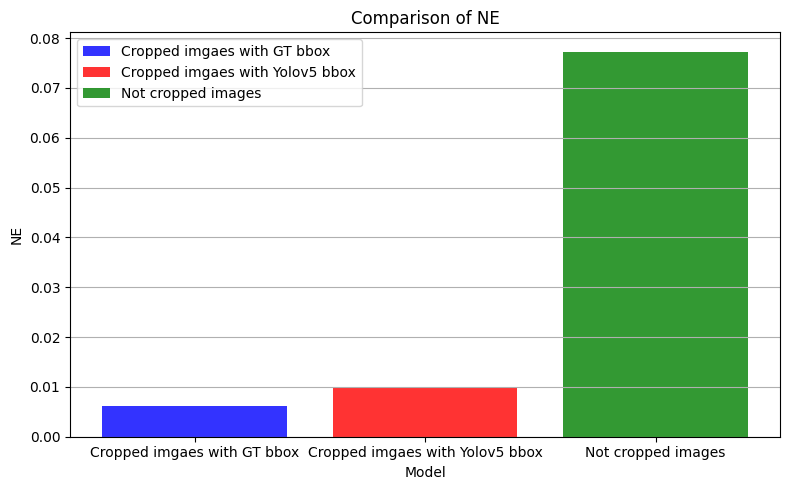

In [3]:
from utils.crop_imgs_preprocess import compare_three_results

csv_file1 = 'runs/val/test_10000_imgs/res_summary.csv' 
csv_file2 = 'runs/val/yolov5_detected_crane/res_summary.csv'
csv_file3 = 'runs/val/NoCropp/res_summary.csv'
metric = 'NE'

compare_three_results(csv_file1, csv_file2, csv_file3, metric, 'Cropped imgaes with GT bbox','Cropped imgaes with Yolov5 bbox', 'Not cropped images',  save_path='Figures_Report/cropping_method.pdf')

# Model trained with 2000 images with Constant lighting conditions. 
##### - Make first a test with normal 50 images---> with different lighting conditions


In [3]:
!python val.py --dataset 'dataset/testdata-1/test' --weights './logs/constant_light/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        

# saved to: runs/val/constant_light

device:  cuda:0
Loading checkpoint ...
 ./logs/constant_light/checkpoint_best_loss.pth 

Checkpoint's epoch:  20

loading annotations from:  dataset/testdata-1/test/labels/labels.csv
100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 964.75it/s]
batch_size:  1
dataset length :  46
Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   2%|▋                               | 1/46 [00:01<01:08,  1.52s/it]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   9%|██▊                             | 4/46 [00:01<00:13,  3.16it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  15%|████▊                           | 7/46 [00:01<00:06,  6.03it/s]Figure(300x300)
Figure(300x300)
Evaluation:  22%|██████▋                        | 10/46 [00:01<00:03,  9.14it/s]Figure(300x300)
Figure(300x300)
Figure(300x

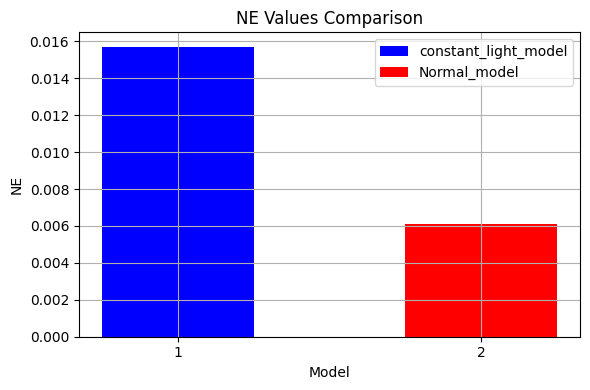

In [5]:
from utils.crop_imgs_preprocess import compare_results


# Example usage:
csv_file1 = 'runs/val/constant_light/res_summary.csv'
csv_file2 = 'runs/val/test_10000_imgs/res_summary.csv' #say 2000 images
metric = 'NE'
compare_results(csv_file1, csv_file2, metric, 'constant_light_model', 'Normal_model',  save_path='Figures_Report/const_light.pdf')

------------------------------

# Model trained on 2000 images with constant Field of View FoV 
#### (fixed camera position in respect to crane)

In [1]:

!python val.py --dataset 'dataset/testdata-1/test' --weights './logs/const_FV/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        


device:  cuda:0
Loading checkpoint ...
 ./logs/const_FV/checkpoint_best_loss.pth 

Checkpoint's epoch:  19

loading annotations from:  dataset/testdata-1/test/labels/labels.csv
100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 690.08it/s]
batch_size:  1
dataset length :  46
Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   2%|▋                               | 1/46 [00:02<01:46,  2.37s/it]Figure(300x300)
Figure(300x300)
Evaluation:   7%|██                              | 3/46 [00:02<00:28,  1.51it/s]Figure(300x300)
Figure(300x300)
Evaluation:  11%|███▍                            | 5/46 [00:02<00:14,  2.85it/s]Figure(300x300)
Figure(300x300)
Evaluation:  15%|████▊                           | 7/46 [00:02<00:08,  4.43it/s]Figure(300x300)
Figure(300x300)
Evaluation:  24%|███████▍                       |

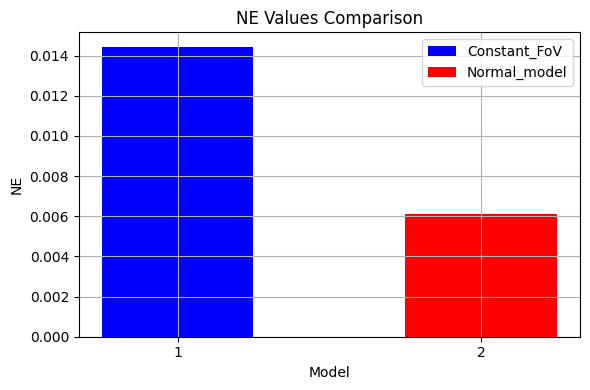

In [1]:
from utils.crop_imgs_preprocess import compare_results


# Example usage:
csv_file1 = 'runs/val/const_FV/res_summary.csv'
csv_file2 = 'runs/val/test_10000_imgs/res_summary.csv' #say 2000 images
metric = 'NE'
compare_results(csv_file1, csv_file2, metric, 'Constant_FoV', 'Normal_model',  save_path='Figures_Report/const_FoV.pdf')

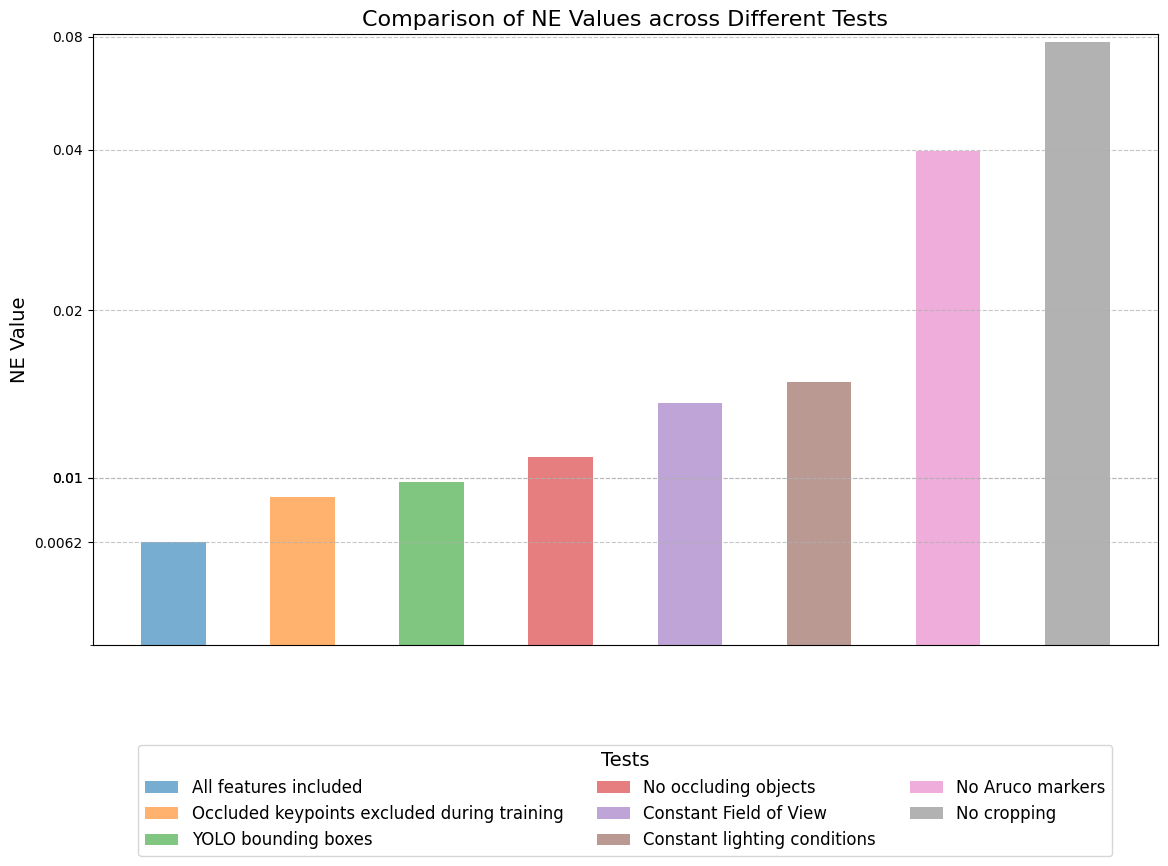

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def compare_results(csv_files, plot_names, save_path=None):
    # Read CSV files into DataFrames
    dfs = [pd.read_csv(csv_file) for csv_file in csv_files]

    # Initialize the plot dimensions and parameters
    num_files = len(csv_files)
    bar_width = 0.02  # Reduced bar width to ensure spacing
    spacing = 0.02  # Space between groups of bars
    group_width = num_files * bar_width + (num_files - 1) * spacing  # Total width for each group of bars
    indices = np.arange(len(dfs[0]))  # Assumes each DataFrame has the same number of entries

    # Initialize the figure
    plt.figure(figsize=(12, 10))

    # Plot each DataFrame's data with adjusted positions
    for i, (df, name) in enumerate(zip(dfs, plot_names)):
        ne_values = df['NE']  # Assuming 'NE' is the column containing the metric
        offsets = indices + (i * (bar_width + spacing))
        plt.bar(offsets, ne_values, width=bar_width, alpha=0.6, label=name)

    # Set up x-axis ticks and labels
    #plt.xlabel('Sample Index', fontsize=14)
    plt.ylabel('NE Value', fontsize=14)
    plt.title('Comparison of NE Values across Different Tests', fontsize=16)
    plt.xticks([])  # Remove x-axis tick marks and labels
    
    plt.yscale('symlog', linthresh=0.025)  # Using symlog with a threshold of 0.3
    plt.yticks([0.00613, 0.01, 0.04, 0.01, 0.02, 0.08], ['0.0062', '0.01', '0.04', '0.01', '0.02', '0.08'])
    plt.yticks(fontsize=10)

    # Display the legend and grid
    plt.legend(title="Tests", fontsize=12, title_fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the rect parameter as needed

    # Save the plot to a file if a save path is provided
    #if save_path:
    plt.savefig('Figures_Report/everything.pdf', format='pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage:
csv_files = [
    'runs/val/test_10000_imgs/res_summary.csv',
     'runs/val/visenable_False/res_summary.csv',
    'runs/val/yolov5_detected_crane/res_summary.csv',
    'runs/val/visenable_False/res_summary-no_occlusion1.csv',
    'runs/val/const_FV/res_summary.csv',
    'runs/val/constant_light/res_summary.csv',
    'runs/val/no_markers_test/without_marker_res_summary.csv',
    'runs/val/NoCropp/res_summary.csv'
    
   
  
   
   
]



plot_names = [
    "All features included",  # more explicit than "All included"
    "Occluded keypoints excluded during training",  # assuming "v" stands for a specific variable
    "YOLO bounding boxes",   # expanded "bbox" to be more descriptive
    "No occluding objects",  # clear as is
    "Constant Field of View",  # expanded "FoV" for clarity
    "Constant lighting conditions",  # clear as is    
    "No Aruco markers",      # specifies what "Aruco" refers to
    "No cropping"     # corrected spelling and clearer
   
   
    
   
]

compare_results(csv_files[:len(plot_names)], plot_names)


-------------------------------------------------------------------------------------------------------------------------------------------

# Test on real images

waiting for dataset....

---------------------

# Test For Stereo system 

Get the keypoint position using the model trained also with Yolo-cropped images.

Run these keypoint-positions on StereoSystem and compare 3D positions with GT


In [6]:
!python val.py --dataset 'dataset/Test_system_gt/left_gtt-1/left' --weights './logs/10000/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        


device:  cpu
Loading checkpoint ...
 ./logs/10000/checkpoint_best_loss.pth 

Checkpoint's epoch:  19

loading annotations from:  dataset/Test_system_gt/left_gtt-1/left/labels/labels.csv
100%|████████████████████████████████████████| 199/199 [00:00<00:00, 897.07it/s]
batch_size:  1
dataset length :  199
Evaluation:   0%|                                       | 0/199 [00:00<?, ?it/s]Evaluation:   0%|                                       | 0/199 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation: 100%|█████████████████████████████| 199/199 [02:12<00:00,  1.50it/s]


--------------------------------------------
mean_loss:  0.000892960706361278
PCK@0.05: 0.3781000077724457
NEavg: 0.06849999725818634
done

Test ended @ 2024-05-04 12:11:00


In [10]:
# Read the preds and adjust/scale them using the bbox and the scale factor

import os
import csv

def read_bbox_from_file(bbox_folder, image_name, original_image_size=(640, 640)):
    bbox_file_path = os.path.join(bbox_folder, image_name.replace('.jpg', '.txt'))
    with open(bbox_file_path, 'r') as f:
        bbox_info = f.readline().strip().split()

        width = float(bbox_info[3]) * original_image_size[0] + 14
        height = float(bbox_info[4]) * original_image_size[1] + 14
        x = float(bbox_info[1]) * original_image_size[0] - width/2
        y = float(bbox_info[2]) * original_image_size[1] - height/2 
        print("bbox x:", x)
        bbox = {"x": x, "y": y, "width": width, "height": height}

    return bbox





def read_keypoints_from_file(keypoints_file, image_name):
    keypoints_list = []
    with open(keypoints_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header row
        for row in reader:
            if row[1] == image_name:
                # Scale each value by 4 as it is converted to float
                keypoints = [float(val) * 4 for val in row[2:]]
                #print(keypoints)
                keypoints_list.append(keypoints)
    return keypoints_list


def scale_keypoints(keypoints, bbox, target_width=288, target_height=384):
    scaled_keypoints = []
    scale_x = target_width / bbox["width"]
    scale_y = target_height / bbox["height"]

    for i in range(0, len(keypoints), 2):
        # Check if the original keypoints x and y are 0
        if keypoints[i] == 0 and keypoints[i+1] == 0:
            x = 0
            y = 0
        else:
            x = round((keypoints[i] / scale_x) + bbox["x"], 4)
            y = round((keypoints[i+1] / scale_y) + bbox["y"], 4)

        scaled_keypoints.extend([x, y])

    return scaled_keypoints





def update_keypoints(input_keypoints_file, output_keypoints_file, bbox_folder, original_image_size=(640, 640)):
    with open(input_keypoints_file, 'r') as input_file, open(output_keypoints_file, 'w', newline='') as output_file:
        reader = csv.reader(input_file)
        writer = csv.writer(output_file)
        writer.writerow(next(reader))  # Write the header row
        for row in reader:
            image_name = row[1]
            print(image_name)
            bbox = read_bbox_from_file(bbox_folder, image_name, original_image_size)
           
            keypoints = read_keypoints_from_file(input_keypoints_file, image_name)
            #print(keypoints)
            scaled_keypoints = scale_keypoints(keypoints[0], bbox)
           
            row[18:34] = scaled_keypoints[0:16]   # Assuming the predicted keypoints are from index 17 to 33
            writer.writerow(row)
#runs/val/RRRRight/preds.csv
            
input_keypoints_file = "runs/val/LLLeft/preds.csv"
output_keypoints_file =  "dataset/Test_system_gt/left_gtt-1/left/adjustedKeyPoinLeft.csv"
bbox_folder =  'dataset/Test_system_gt/left_gtt-1/labels'
update_keypoints(input_keypoints_file, output_keypoints_file, bbox_folder)


rgb_2726.jpg
bbox x: 4.0
rgb_2776.jpg
bbox x: -7.0
rgb_1901.jpg
bbox x: 188.0
rgb_2826.jpg
bbox x: -7.0
rgb_2976.jpg
bbox x: -7.0
rgb_1951.jpg
bbox x: 176.0
rgb_1526.jpg
bbox x: 200.0
rgb_4926.jpg
bbox x: 205.0
rgb_1001.jpg
bbox x: 190.0
rgb_2526.jpg
bbox x: -7.0
rgb_4051.jpg
bbox x: -7.0
rgb_4076.jpg
bbox x: -7.0
rgb_1976.jpg
bbox x: 170.0
rgb_4826.jpg
bbox x: 193.0
rgb_4026.jpg
bbox x: -7.0
rgb_2851.jpg
bbox x: -7.0
rgb_226.jpg
bbox x: 201.0
rgb_726.jpg
bbox x: 200.0
rgb_4701.jpg
bbox x: 162.0
rgb_426.jpg
bbox x: 200.0
rgb_2201.jpg
bbox x: 32.0
rgb_1301.jpg
bbox x: 198.0
rgb_876.jpg
bbox x: 194.0
rgb_2426.jpg
bbox x: -7.0
rgb_576.jpg
bbox x: 200.0
rgb_1751.jpg
bbox x: 205.0
rgb_1876.jpg
bbox x: 194.0
rgb_2151.jpg
bbox x: 77.0
rgb_526.jpg
bbox x: 202.0
rgb_4976.jpg
bbox x: 205.0
rgb_3201.jpg
bbox x: -7.0
rgb_751.jpg
bbox x: 200.0
rgb_826.jpg
bbox x: 197.0
rgb_1101.jpg
bbox x: 194.0
rgb_3676.jpg
bbox x: 18.0
rgb_26.jpg
bbox x: 200.0
rgb_4501.jpg
bbox x: 148.0
rgb_2126.jpg
bbox x: 96.0


In [12]:
# Select columns in adjustedKeyPoinRight.csv and adjustedKeyPoinleft.csv

import pandas as pd


# Read the CSV file
df = pd.read_csv( "dataset/Test_system_gt/right_gtt-1/right/adjustedKeyPoinRight.csv")

# Extract the desired columns
desired_columns = ['imgId', 'x1_pred', 'y1_pred', 'x2_pred', 'y2_pred', 'x3_pred', 'y3_pred', 'x4_pred', 'y4_pred', 'x5_pred', 'y5_pred', 'x6_pred', 'y6_pred', 'x7_pred', 'y7_pred', 'x8_pred', 'y8_pred', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
df_selected = df[desired_columns]

# Write the selected columns to a new CSV file
df_selected.to_csv("dataset/Test_system_gt/right_gtt-1/right/selected_columns.csv", index=False)


In [13]:
# Rename the header in right and left 'add the _left and _right ending'


# Read the CSV file
dfl = pd.read_csv("dataset/Test_system_gt/left_gtt-1/left/selected_columns.csv")
dfr = pd.read_csv("dataset/Test_system_gt/right_gtt-1/right/selected_columns.csv")

# Rename the columns
new_column_namesr = ['image_id',
                    'base_sylinder1_x_right',
                    'base_sylinder1_y_right',
                    'base_sylinder2_x_right',
                    'base_sylinder2_y_right',
                    'base_boom_pivot1_x_right',
                    'base_boom_pivot1_y_right',
                    'base_boom_pivot2_x_right',
                    'base_boom_pivot2_y_right',
                    'innerBoom_tip1_x_right',
                    'innerBoom_tip1_y_right',
                    'innerBoom_tip2_x_right',
                    'innerBoom_tip2_y_right',
                    'tip1_x_right',
                    'tip1_y_right',
                    'tip2_x_right',
                    'tip2_y_right',
                    'base_sylinder1_v',
                    'base_sylinder2_v',
                    'base_boom_pivot1_v',
                    'base_boom_pivot2_v',
                    'innerBoom_tip1_v',
                    'innerBoom_tip2_v',
                    'tip1_v',
                    'tip2_v']

new_column_namesl = ['image_id',
                    'base_sylinder1_x_left',
                    'base_sylinder1_y_left',
                    'base_sylinder2_x_left',
                    'base_sylinder2_y_left',
                    'base_boom_pivot1_x_left',
                    'base_boom_pivot1_y_left',
                    'base_boom_pivot2_x_left',
                    'base_boom_pivot2_y_left',
                    'innerBoom_tip1_x_left',
                    'innerBoom_tip1_y_left',
                    'innerBoom_tip2_x_left',
                    'innerBoom_tip2_y_left',
                    'tip1_x_left',
                    'tip1_y_left',
                    'tip2_x_left',
                    'tip2_y_left',
                    'base_sylinder1_v',
                    'base_sylinder2_v',
                    'base_boom_pivot1_v',
                    'base_boom_pivot2_v',
                    'innerBoom_tip1_v',
                    'innerBoom_tip2_v',
                    'tip1_v',
                    'tip2_v']


dfr.columns = new_column_namesr
dfl.columns = new_column_namesl


# Write the updated dataframe to a new CSV file
dfr.to_csv("dataset/Test_system_gt/right_gtt-1/right/ready_right.csv", index=False)
dfl.to_csv("dataset/Test_system_gt/left_gtt-1/left/ready_left.csv", index=False)
